In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# plt.style.use('ggplot')
# import matplotlib2tikz

idx = pd.IndexSlice
sys.path.append(str(Path.cwd()))

from plotting_constants import colors

In [4]:
root = Path.cwd().parent.parent.parent / "cluster_data"

In [99]:
mode = "static"
assert mode in ["static", "both"]

def get_pre_data(mode, op):

    index_col = [0,1,2]
    header = [0,1,2,3,4,5,6,7,8]

    if mode == "chp" or mode == "dh":
        df = pd.read_csv(
            root / f"{mode}_data" / 
            # f"csvs_{op}" / 
            "nodal_capacities.csv", 
            index_col=index_col,
            header=header,
            )

    elif mode == "elec":
        if op == "flex":
            df = pd.read_csv(
                root / f"elec_data_flex" / "nodal_capacities.csv",
                index_col=index_col,
                header=header,
            )
        else:
            df = pd.read_csv(
                root / f"{mode}_data" / "nodal_capacities.csv",
                index_col=index_col,
                header=header,
            )

    return df.loc[:,idx[:,:,:,:,:,mode,op]]


def get_post_data(app):

    index_col = [0,1,2]
    header = [0,1,2,3,4,5,6,7,8]

    df = pd.read_csv(
        root /
        "breyer_sweep" /
        "joint_data" /
        "nodal_capacities.csv", 
        index_col=index_col, 
        header=header,
        )

    return df.loc[:,idx[:,:,:,:,:,app]]

app = "chp"
elec_pre = get_pre_data(app, "static")
elec_pre.columns = elec_pre.columns.get_level_values(4).astype(int)
elec_pre.index = elec_pre.index.droplevel(0)
# chp_static = get_pre_data("chp", "static")
# dh_static = get_pre_data("dh", "static")

elec_post = get_post_data(app)
elec_post.columns = elec_post.columns.get_level_values(4).astype(int)
elec_post.index = elec_post.index.droplevel(0)


In [100]:
elec_pre

egs_capex                                               1000          1500  \
NaN   gas                                      460772.921398  1.096604e+07   
      oil                                           0.000700  4.121556e-04   
AL1 0 offwind-ac                                    0.001981  6.955373e-04   
      onwind                                        0.002288  1.045667e-03   
      residential rural solar thermal               0.005457  3.236674e-03   
...                                                      ...           ...   
SK1 0 residential rural water tanks              3823.424599  3.830236e+03   
      residential urban decentral water tanks    2781.485726  2.932133e+03   
      services rural water tanks                 2123.598432  2.121832e+03   
      services urban decentral water tanks       1425.973148  1.468971e+03   
      urban central water tanks                 75446.146892  7.558420e+04   

egs_capex                                              2000          2500  \
NaN   gas                                      3.030187e+06  3.223509e+07   
      oil                                      6.179071e-04  6.498150e-04   
AL1 0 offwind-ac                               1.249903e-03  1.079266e-03   
      onwind                                   2.151268e-03  2.331913e-03   
      residential rural solar thermal          5.061349e-03  6.521574e-03   
...                                                     ...           ...   
SK1 0 residential rural water tanks            3.831615e+03  3.831339e+03   
      residential urban decentral water tanks  3.024017e+03  3.024089e+03   
      services rural water tanks               2.120148e+03  2.119227e+03   
      services urban decentral water tanks     1.516261e+03  1.526536e+03   
      urban central water tanks                1.310388e+05  1.788556e+05   

egs_capex                                              3000          3500  \
NaN   gas                                      2.174162e+07  6.718326e+06   
      oil                                      4.050799e-04  4.654553e-04   
AL1 0 offwind-ac                               5.498426e-04  7.861672e-04   
      onwind                                   1.333101e-03  1.810493e-03   
      residential rural solar thermal          3.769921e-03  5.846262e-03   
...                                                     ...           ...   
SK1 0 residential rural water tanks            3.830744e+03  3.808519e+03   
      residential urban decentral water tanks  3.024128e+03  3.019976e+03   
      services rural water tanks               2.111128e+03  2.089111e+03   
      services urban decentral water tanks     1.512720e+03  1.426032e+03   
      urban central water tanks                1.793239e+05  1.742197e+05   

egs_capex                                              4000           4500  \
NaN   gas                                      9.444057e+06   95512.714578   
      oil                                      4.809391e-04       0.000490   
AL1 0 offwind-ac                               9.942995e-04       0.000693   
      onwind                                   2.025608e-03       0.001258   
      residential rural solar thermal          5.307771e-03       0.005978   
...                                                     ...            ...   
SK1 0 residential rural water tanks            3.739324e+03    3739.400858   
      residential urban decentral water tanks  2.912424e+03    2922.974063   
      services rural water tanks               2.017972e+03    2018.664273   
      services urban decentral water tanks     1.409752e+03    1379.336657   
      urban central water tanks                1.890078e+05  190075.906409   

egs_capex                                               5000          5500  \
NaN   gas                                       83156.320202  1.237057e+06   
      oil                                           0.000431  2.512833e-04   
AL1 0 offwind-ac                          

In [101]:
str(Path.cwd() / "new_{}").format('3')

'c:\\Users\\lukas\\OneDrive\\Desktop\\projects\\egs\\coding\\basic_egs\\notebooks\\new_3'

In [102]:
capex_template = str(
    Path.cwd().parent.parent.parent /
    "cluster_data" /
    "breyer_sweep" /
    "egs_costs_s_72_{}.csv"
    )

year_costs = list()

for year in elec_post.columns:

    capex = pd.read_csv(capex_template.format(year)).set_index("name")["capex_min"]
    year_costs.append(capex)

year_costs = pd.concat(year_costs, axis=1).T
year_costs.index = elec_post.columns
year_costs = year_costs.T

year_costs

egs_capex,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
name,,,,,,,,,,,,,
AL1 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1 0,8165.080729,5155.512777,3863.980514,2895.996200,2170.506285,1626.762333,1157.309927,818.765304,633.121868,458.300377,333.965435,263.265305,231.087259
BA1 0,28788.223092,20612.252713,15448.578304,11578.480767,8677.899950,6503.957561,4471.768002,3163.654265,2446.340470,1770.841945,1290.420059,1017.239498,892.905682
BE1 0,11757.384163,7847.891027,5881.878159,4408.380616,3304.016019,2476.311100,1734.648672,1227.216767,948.962747,686.929337,500.568330,394.598544,346.368071
BG1 0,18555.087740,12942.669238,9700.339015,7270.260507,5448.952635,4083.909344,2827.144816,2000.128081,1546.627369,1119.563140,815.830423,643.119986,564.513559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RS1 0,15630.950334,10751.071535,8057.768977,6039.178577,4526.274951,3392.376077,2357.190690,1667.648316,1289.532681,933.459013,680.215554,536.214641,470.674901
SE2 0,23914.363066,16959.366766,12710.794357,9526.552225,7140.009880,5351.331718,3688.463284,2609.487476,2017.823152,1460.649455,1064.381472,839.053041,736.498366
SE2 1,28382.503047,20308.171544,15220.673969,11407.669842,8549.879689,6408.008271,4406.562513,3117.523154,2410.668936,1745.020254,1271.603682,1002.406528,879.885698


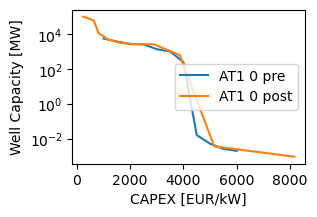

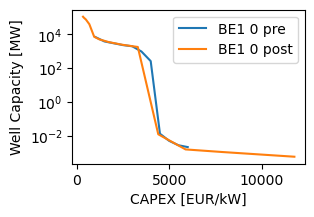

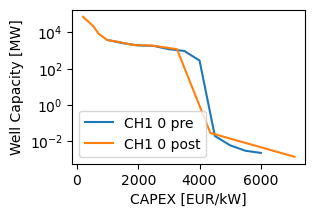

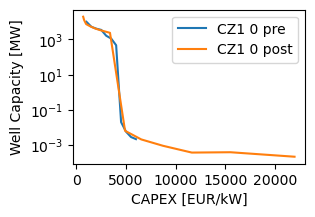

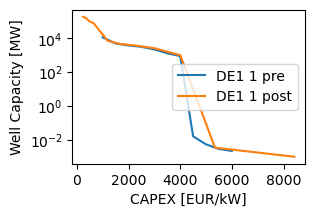

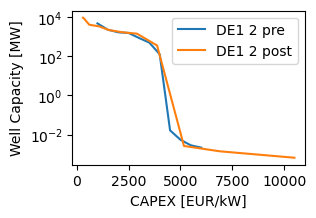

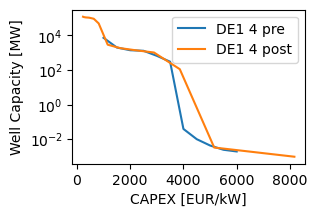

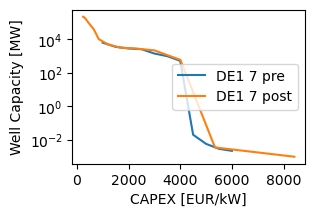

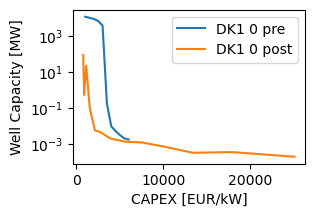

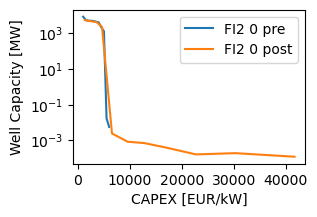

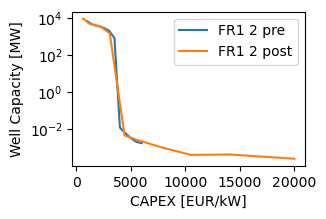

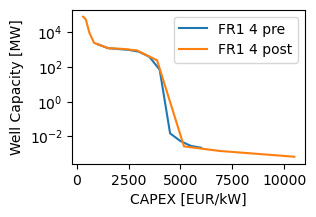

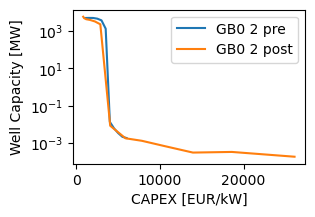

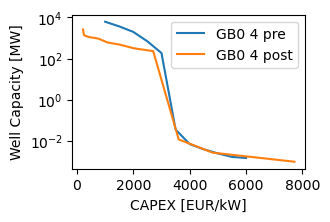

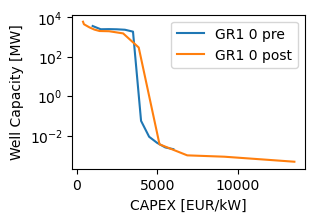

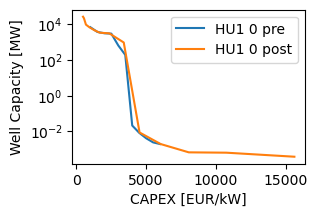

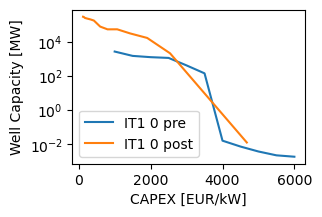

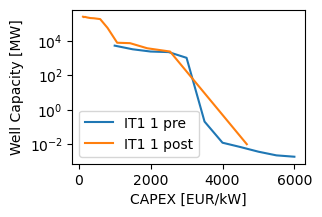

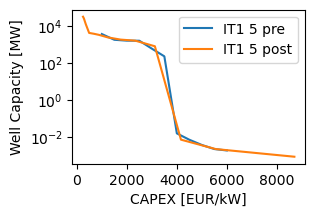

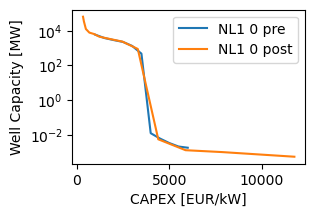

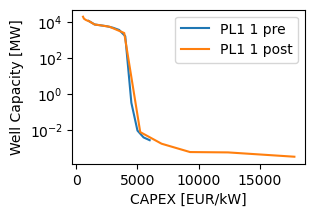

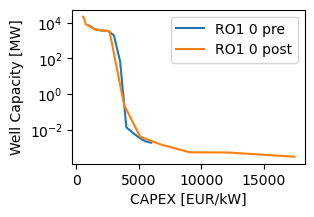

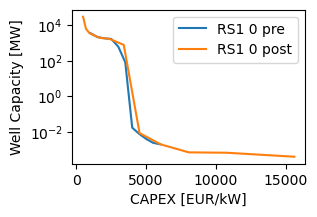

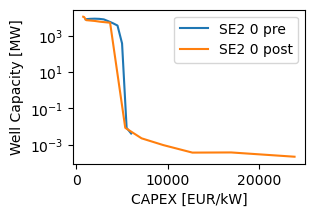

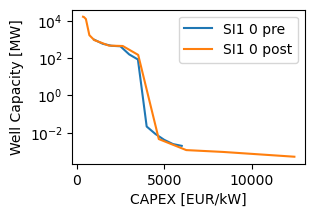

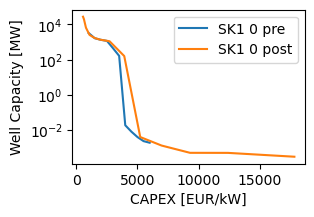

26


In [103]:

def plot_cost(data, bus, carrier, ax):
    if 1990 in data.columns:
        capex = year_costs.loc[bus, data.columns.tolist()]
        label = "post"
    
    else:
        capex = data.columns.tolist()
        label = "pre"
    
    y = data.loc[idx[bus, carrier], :].values.flatten()
    ax.plot(capex, y, label=f"{bus} {label}")


counter = 0

carrier = "injection geothermal heat"
for bus in year_costs.index:
    

    pre = elec_pre.loc[idx[bus, carrier], :].values.flatten()
    post = elec_post.loc[idx[bus, carrier], :].values.flatten()

    if pre.max() < 5e3 and post.max() < 5e3:
        continue

    counter += 1

    fig, ax = plt.subplots(1, 1, figsize=(3, 2))

    plot_cost(elec_pre, bus, carrier, ax)
    plot_cost(elec_post, bus, carrier, ax)

    ax.set_ylabel("Well Capacity [MW]")
    ax.set_xlabel("CAPEX [EUR/kW]")

    ax.set_yscale("log")
    ax.legend()
    plt.show()

print(counter)